# **Test of Prophet with historical data of covid-19**

Importando as bibliotecas

In [0]:
import pandas as pd 
import numpy as np

from fbprophet import Prophet

importando a base de dados do Github

In [0]:
covid = pd.read_csv('https://raw.githubusercontent.com/RafaelLopes01/covid-19/master/covid_19_data.csv')

In [104]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Mudado o nome das colunas

In [0]:
covid.rename(columns={'ObservationDate':'Date','Country/Region':'Country','Province/State':'State'}, inplace= True)

In [106]:
covid.tail()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
8504,8505,03/24/2020,Wuhan Evacuee,US,2020-03-24 23:41:50,4.0,0.0,0.0
8505,8506,03/24/2020,Wyoming,US,2020-03-24 23:41:50,29.0,0.0,0.0
8506,8507,03/24/2020,Xinjiang,Mainland China,2020-03-24 23:41:50,76.0,3.0,73.0
8507,8508,03/24/2020,Yunnan,Mainland China,2020-03-24 23:41:50,176.0,2.0,172.0
8508,8509,03/24/2020,Zhejiang,Mainland China,2020-03-24 23:41:50,1240.0,1.0,1221.0


Agrupando por Data


In [107]:
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()

,Date,Deaths
58,03/20/2020,11299.0
59,03/21/2020,12973.0
60,03/22/2020,14623.0
61,03/23/2020,16497.0
62,03/24/2020,18615.0


In [108]:
casos_confirmados = covid.groupby('Date').sum()['Confirmed'].reset_index()
casos_confirmados.tail()

,Date,Confirmed
58,03/20/2020,272167.0
59,03/21/2020,304528.0
60,03/22/2020,337020.0
61,03/23/2020,378287.0
62,03/24/2020,417966.0


In [109]:
recuperados = covid.groupby('Date').sum()['Recovered'].reset_index()
recuperados.tail()

,Date,Recovered
58,03/20/2020,87403.0
59,03/21/2020,91676.0
60,03/22/2020,97243.0
61,03/23/2020,100958.0
62,03/24/2020,107705.0


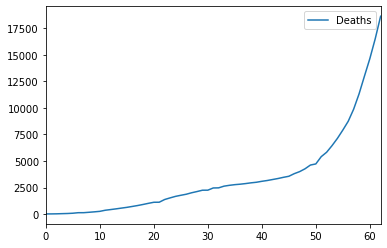

In [110]:
mortes.plot()

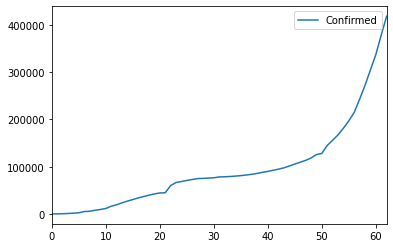

In [111]:
casos_confirmados.plot()

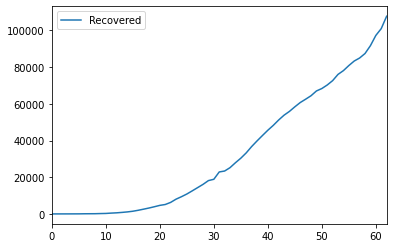

In [112]:
recuperados.plot()

## **Prophet**

Modificando as colunas para o padrão Prophet **(DS e Y)** - 

**Coluna DS** = Data no Formato do Pandas.

**Coluna Y** = Numerica e representa a medida que desejamos prever.

In [113]:
# Renomeando as Colunas
mortes.columns = ['ds','y']
mortes.tail()

,ds,y
58,03/20/2020,11299.0
59,03/21/2020,12973.0
60,03/22/2020,14623.0
61,03/23/2020,16497.0
62,03/24/2020,18615.0


In [114]:
casos_confirmados.columns = ['ds','y']
casos_confirmados.tail()

,ds,y
58,03/20/2020,272167.0
59,03/21/2020,304528.0
60,03/22/2020,337020.0
61,03/23/2020,378287.0
62,03/24/2020,417966.0


In [115]:
recuperados.columns = ['ds','y']
recuperados.tail()

,ds,y
58,03/20/2020,87403.0
59,03/21/2020,91676.0
60,03/22/2020,97243.0
61,03/23/2020,100958.0
62,03/24/2020,107705.0


In [116]:
#Data no Padrão do Pandas
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
58,2020-03-20,11299.0
59,2020-03-21,12973.0
60,2020-03-22,14623.0
61,2020-03-23,16497.0
62,2020-03-24,18615.0


In [117]:
casos_confirmados['ds'] = pd.to_datetime(casos_confirmados['ds'])
casos_confirmados.tail()

,ds,y
58,2020-03-20,272167.0
59,2020-03-21,304528.0
60,2020-03-22,337020.0
61,2020-03-23,378287.0
62,2020-03-24,417966.0


In [118]:
recuperados['ds'] = pd.to_datetime(recuperados['ds'])
recuperados.tail()

,ds,y
58,2020-03-20,87403.0
59,2020-03-21,91676.0
60,2020-03-22,97243.0
61,2020-03-23,100958.0
62,2020-03-24,107705.0


## Previsão de Mortes, Numero de Infectados e Curados da COVID-19 no Mundo.



In [0]:
dias = 15

In [0]:
# Criando o modelo do Prophet 
m = Prophet(interval_width=0.95)
c = Prophet(interval_width=0.95)
r = Prophet(interval_width=0.95)

In [0]:
# Treinando direto com o Dataframe, pois ele ja esta no formato do pandas.
m.fit(mortes)
c.fit(casos_confirmados)
r.fit(recuperados)

In [0]:
#Criando um Futuro no periodo de N Dias
futuro_mortes = m.make_future_dataframe(periods=dias)
futuro_confirmados = c.make_future_dataframe(periods=dias)
futuro_recuperados = r.make_future_dataframe(periods=dias)

In [0]:
futuro_mortes.tail(dias)

In [0]:
# Previsão usado o futuro criado pelo Prophet
previsao_mortes = m.predict(futuro_mortes)
previsao_confirmados = c.predict(futuro_confirmados)
previsao_recuperados = r.predict(futuro_recuperados)
previsao_recuperados.tail(dias)

In [0]:
#Previsão de Mortes
previsao_mortes[['ds','yhat_lower','yhat', 'yhat_upper']].tail(dias)

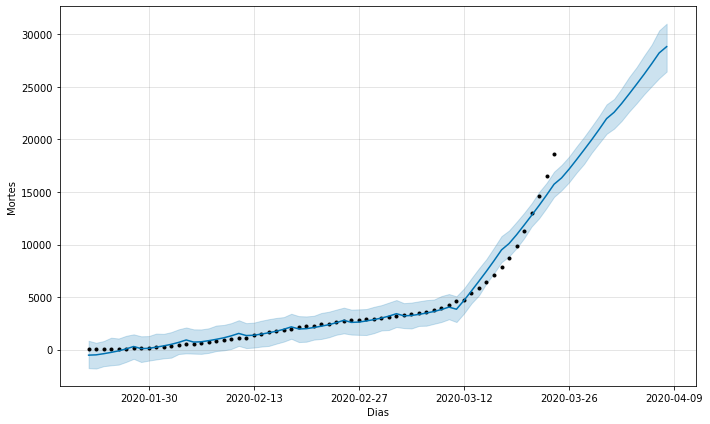

In [126]:
# Plot com a Previsão de Mortes
confirmed_forecast_plot = m.plot(previsao_mortes, xlabel='Dias', ylabel='Mortes')

In [0]:
#Previsão de Casos Confirmados
previsao_confirmados[['ds','yhat_lower','yhat', 'yhat_upper']].tail(dias)

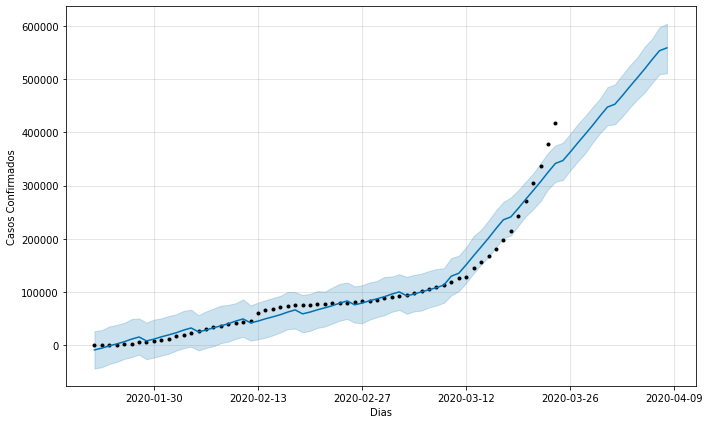

In [128]:
# Plot com a Previsão de Casos Confirmados
confirmed_forecast_plot = c.plot(previsao_confirmados, xlabel='Dias', ylabel='Casos Confirmados')

In [0]:
#Previsão de Casos Recuperados
previsao_recuperados[['ds','yhat_lower','yhat', 'yhat_upper']].tail(dias)

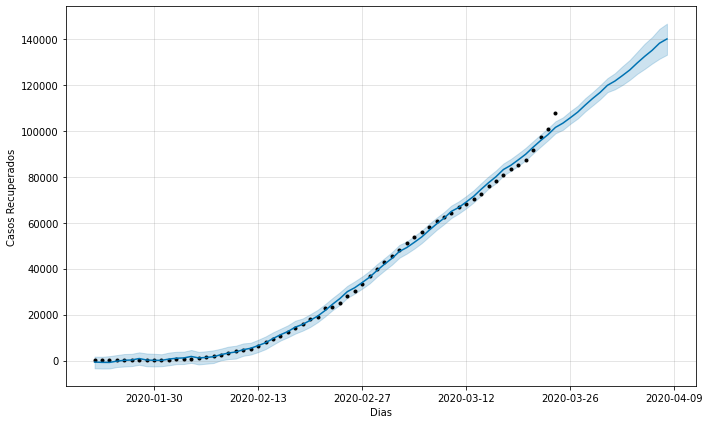

In [130]:
# Plot com a Previsão de Casos Recuperados
confirmed_forecast_plot = r.plot(previsao_recuperados, xlabel='Dias', ylabel='Casos Recuperados')